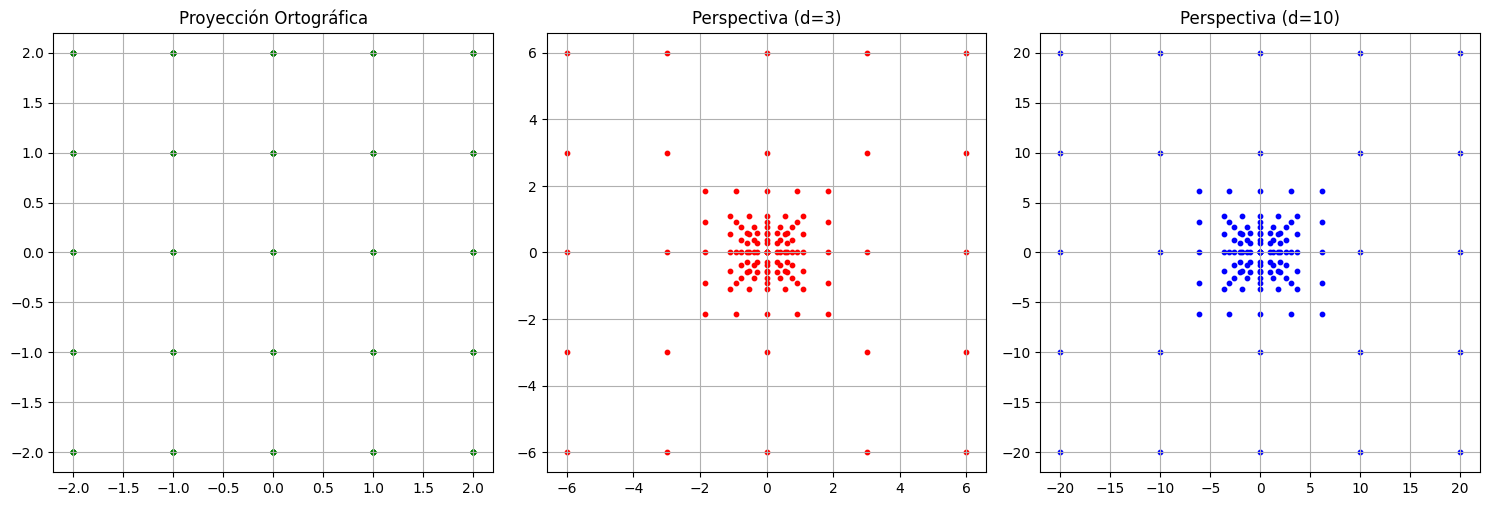

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de puntos 3D (por ejemplo, una cuadrícula)
def generar_puntos_grid(size=5, spacing=1.0):
    x = np.linspace(-size, size, 2*size+1) * spacing
    y = np.linspace(-size, size, 2*size+1) * spacing
    z = np.linspace(1, 10, 5)  # Para tener profundidad
    puntos = []
    for zi in z:
        for xi in x:
            for yi in y:
                puntos.append([xi, yi, zi])
    return np.array(puntos).T  # Transpuesta para shape (3, N)

# Proyección Ortográfica
def proyectar_ortogonal(puntos):
    P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]
    ])
    puntos_hom = np.vstack((puntos, np.ones((1, puntos.shape[1]))))
    proy = P @ puntos_hom
    return proy[:2]

# Proyección en Perspectiva
def proyectar_perspectiva(puntos, d=5.0):
    P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1/d, 0]
    ])
    puntos_hom = np.vstack((puntos, np.ones((1, puntos.shape[1]))))
    proy = P @ puntos_hom
    proy /= proy[-1, :]
    return proy[:2]

# Visualización
def visualizar(puntos_2d, titulo, ax, color='blue'):
    ax.scatter(puntos_2d[0], puntos_2d[1], s=10, c=color)
    ax.set_title(titulo)
    ax.set_aspect('equal')
    ax.grid(True)

# Main
if __name__ == "__main__":
    puntos_3d = generar_puntos_grid(size=2, spacing=1.0)

    # Proyecciones
    orto = proyectar_ortogonal(puntos_3d)
    persp_1 = proyectar_perspectiva(puntos_3d, d=3.0)
    persp_2 = proyectar_perspectiva(puntos_3d, d=10.0)

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    visualizar(orto, "Proyección Ortográfica", axs[0], color='green')
    visualizar(persp_1, "Perspectiva (d=3)", axs[1], color='red')
    visualizar(persp_2, "Perspectiva (d=10)", axs[2], color='blue')

    plt.tight_layout()
    plt.show()
